<a href="https://colab.research.google.com/github/Ahmed-sakr123/loop/blob/main/K_Nearest_Neighbor(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('Rent.csv')

In [ ]:
df.head()

,BHK,Rent,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22
0,2,10000.0,1100.000000,454,220,4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20000.0,967.936049,14,1525,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000.0,1000.000000,14,1758,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,10000.0,967.936049,10,525,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,7500.0,850.000000,10,1888,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(4727, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BHK            4727 non-null   int64  
 1   Rent           4727 non-null   float64
 2   Size           4727 non-null   float64
 3   Floor          4727 non-null   int64  
 4   Area Locality  4727 non-null   int64  
 5   City           4727 non-null   int64  
 6   Bathroom       4727 non-null   float64
 7   N_11           4727 non-null   float64
 8   N_12           4727 non-null   float64
 9   N_13           4727 non-null   float64
 10  N_14           4727 non-null   float64
 11  N_15           4727 non-null   float64
 12  N_16           4727 non-null   float64
 13  N_17           4727 non-null   float64
 14  N_18           4727 non-null   float64
 15  N_19           4727 non-null   float64
 16  N_20           4727 non-null   float64
 17  N_21           4727 non-null   float64
 18  N_22    

In [ ]:
X=df.drop('Rent',axis =1)
y= df[['Rent']]

In [ ]:
X.head()

,BHK,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22
0,2,1100.000000,454,220,4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,967.936049,14,1525,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,1000.000000,14,1758,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,967.936049,10,525,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,850.000000,10,1888,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


In [ ]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (3781, 18)  y_train =  (3781, 1)
X_test  =  (946, 18)  y_test  =  (946, 1)


In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
models ={
    #"Linear Regression":LinearRegression(),
    #"Lasso":Lasso(),
    #"Ridge":Ridge(),
    "KNN":KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=1) #  minkowski , euclidean , manhattan
}

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [ ]:
errors=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    MAE_Train = mean_absolute_error(y_train,model.predict(X_train))
    MAE_Test  =  mean_absolute_error(y_test,model.predict(X_test))

    MSE_Train = mean_squared_error(y_train,model.predict(X_train))
    MSE_Test  =  mean_squared_error(y_test,model.predict(X_test))

    RMSE_Train = root_mean_squared_error(y_train,model.predict(X_train))
    RMSE_Test  =  root_mean_squared_error(y_test,model.predict(X_test))

    R_Train = r2_score(y_train,model.predict(X_train))
    R_Test  =  r2_score(y_test,model.predict(X_test))

    errors.append([MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test])
    #print(Acc_train,Acc_test)

In [ ]:
errors

[[11299.356096270827,
  953859888.9713093,
  30884.62220865441,
  0.7166767959187613,
  14766.175264270614,
  1129924134.3424525,
  33614.34417540304,
  0.5887067933033704]]

In [ ]:
pd.DataFrame(errors,columns=["MAE_Train","MSE_Train","RMSE_Train","R_Train","MAE_Test","MSE_Test","RMSE_Test","R_Test"],index=models.keys())

,MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test
KNN,11299.356096,9.538599e+08,30884.622209,0.716677,14766.175264,1.129924e+09,33614.344175,0.588707


# Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("stroke.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0,1,1,0.50,1,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0,0,1,0.75,0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0,1,1,0.50,0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0,0,1,0.50,1,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1,0,1,0.75,0,0.549349,0.156930,0.666667,1


In [ ]:
df.shape

(5110, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 439.3 KB


In [ ]:
X=df.drop('stroke',axis =1)
y= df[['stroke']]

In [ ]:
y.value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

In [ ]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100,stratify=y)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (4088, 10)  y_train =  (4088, 1)
X_test  =  (1022, 10)  y_test  =  (1022, 1)


In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models ={
    #"Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1) #  minkowski , euclidean , manhattan
}

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,\
    f1_score ,confusion_matrix,classification_report,roc_curve,auc
from sklearn.metrics import precision_recall_curve, average_precision_score

c:\Users\MG magic\anaconda3\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[967   5]
 [ 49   1]]


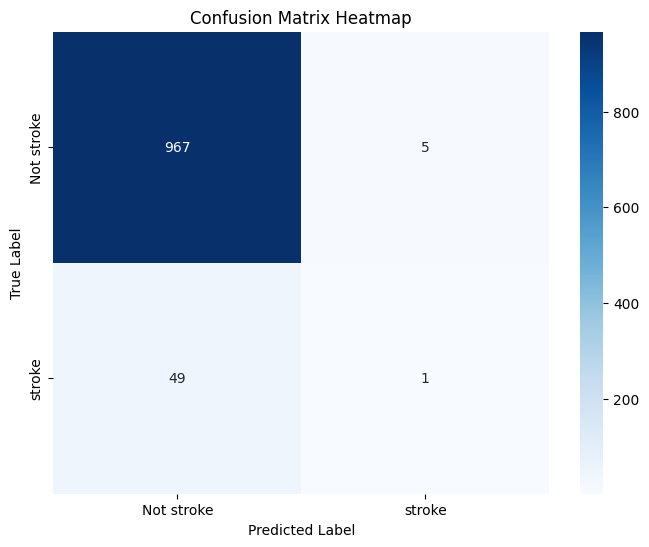

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.56      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022



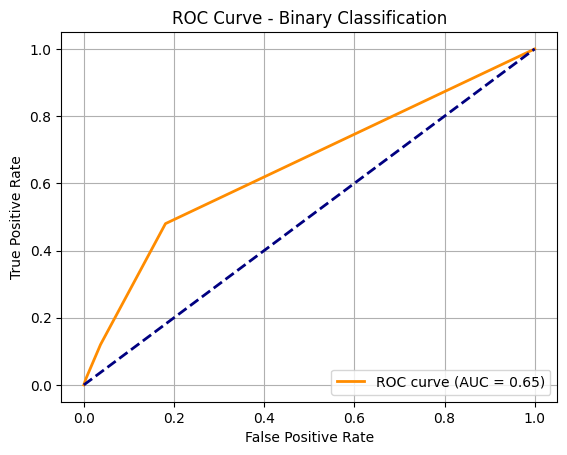

Average Precision (AP): 0.086


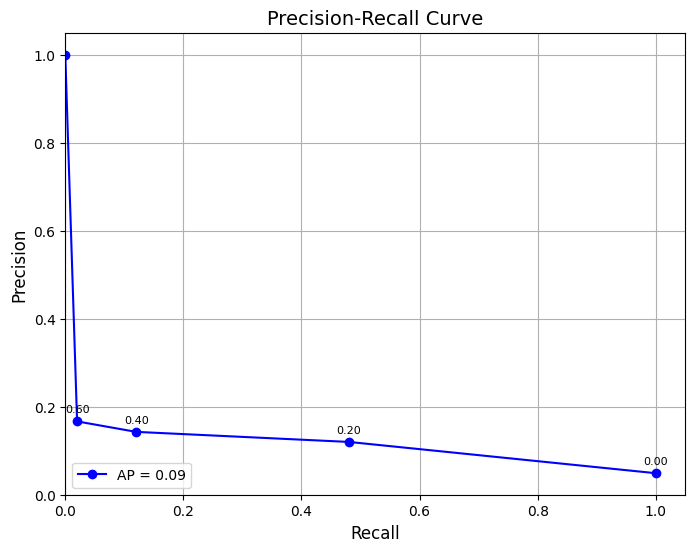

In [ ]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train,average='binary') #'binary','micro','macro','weighted'
    Pre_Test  =  precision_score(y_test,y_pred_test,average='binary')

    Rec_Train = recall_score(y_train,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_train,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not stroke','stroke']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test)[:,1]

    # 5. Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # 6. Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    # y_pred_prob: Predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # removed extra space at the start

    # 1) Compute precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # 2) Compute Average Precision (AP)
    ap = average_precision_score(y_test, y_pred_prob)
    print(f"Average Precision (AP): {ap:.3f}")

    # 3) Plot the PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', color='blue', label=f'AP = {ap:.2f}')

    # Optional: add threshold labels
    for r, p, t in zip(recall, precision, list(thresholds) + [None]):
        if t is not None:
            plt.text(r, p + 0.02, f'{t:.2f}', fontsize=8, ha='center')

    # Customize the plot
    plt.title('Precision-Recall Curve', fontsize=14)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()



In [ ]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
KNN,0.95499,0.777778,0.105528,0.185841,0.947162,0.166667,0.02,0.035714


# Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
Smote = SMOTE(k_neighbors=10)

In [ ]:
X_resample,y_resample = Smote.fit_resample(X_train,y_train)

In [ ]:
X_resample.shape,y_resample.shape

((7778, 10), (7778, 1))

c:\Users\MG magic\anaconda3\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[845 127]
 [ 35  15]]


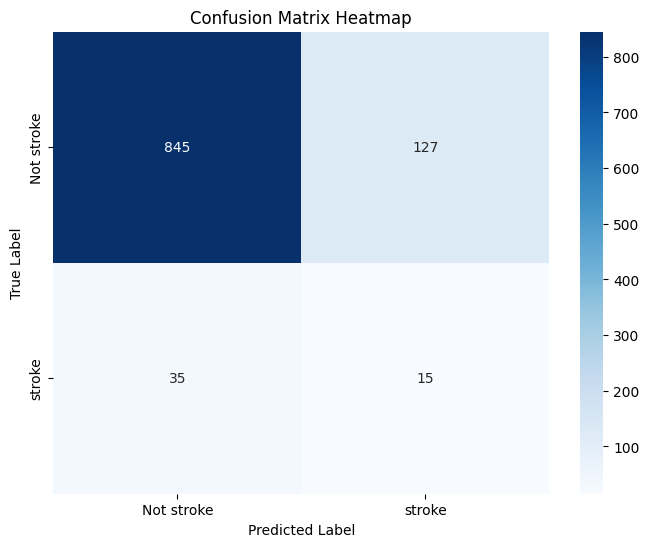

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.11      0.30      0.16        50

    accuracy                           0.84      1022
   macro avg       0.53      0.58      0.53      1022
weighted avg       0.92      0.84      0.88      1022



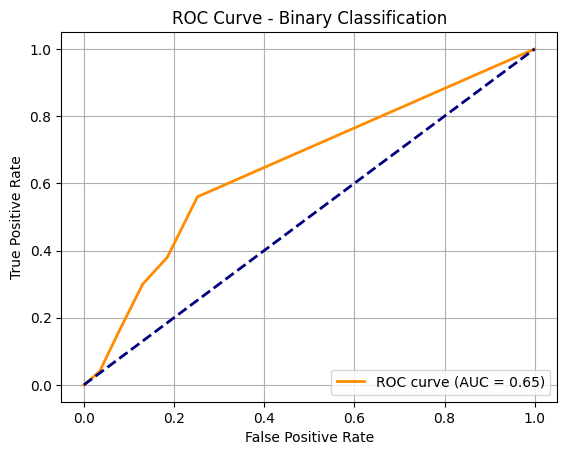

In [ ]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_resample,y_resample )
    y_pred_train = model.predict(X_resample)
    y_pred_test = model.predict(X_test)

    Acc_Train = accuracy_score(y_resample,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_resample,y_pred_train,average='binary') #'binary','micro','macro','weighted'
    Pre_Test  =  precision_score(y_test,y_pred_test,average='binary')

    Rec_Train = recall_score(y_resample,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_resample,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not stroke','stroke']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test)[:,1]

    # 5. Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # 6. Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


# Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Smote = RandomUnderSampler()

In [ ]:
X_resample,y_resample = Smote.fit_resample(X_train,y_train)

In [ ]:
X_resample.shape,y_resample.shape

((398, 10), (398, 1))

[[664 308]
 [ 14  36]]


c:\Users\MG magic\anaconda3\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


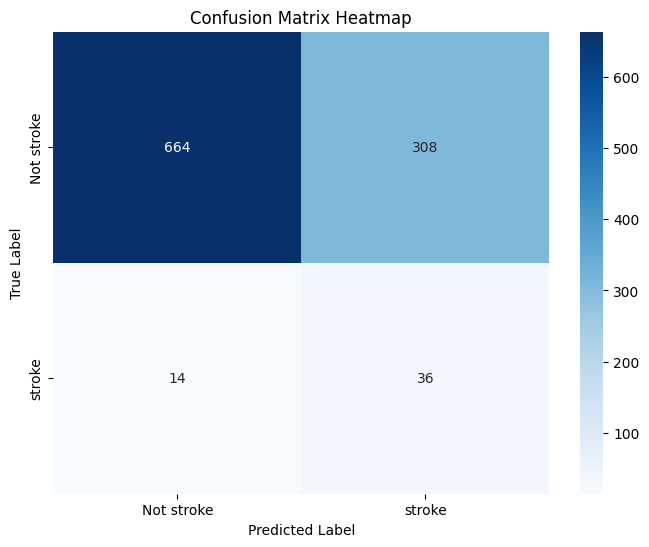

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       972
           1       0.10      0.72      0.18        50

    accuracy                           0.68      1022
   macro avg       0.54      0.70      0.49      1022
weighted avg       0.94      0.68      0.77      1022



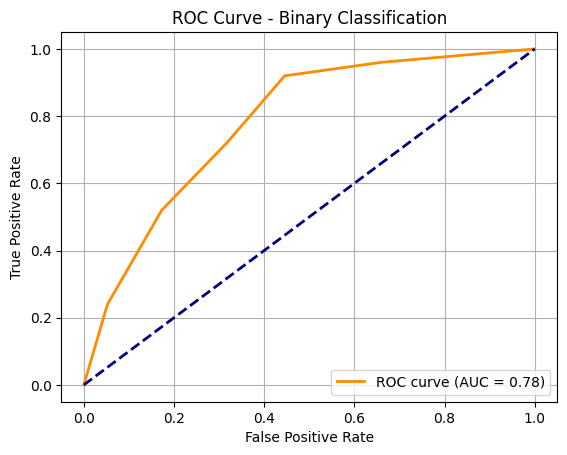

In [ ]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_resample,y_resample )
    y_pred_train = model.predict(X_resample)
    y_pred_test = model.predict(X_test)

    Acc_Train = accuracy_score(y_resample,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_resample,y_pred_train,average='binary') #'binary','micro','macro','weighted'
    Pre_Test  =  precision_score(y_test,y_pred_test,average='binary')

    Rec_Train = recall_score(y_resample,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_resample,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not stroke','stroke']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test)[:,1]

    # 5. Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # 6. Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
